# Look at Cross Val Scores for ModelNet10

In [32]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import pandas as pd
from read_results import load_results, convert_num_to_percent

df = load_results('ModelNet10')

In [33]:
df.iloc[:,:-2]

accuracy  mean_avg_prec  rot_accuracy  rot_mean_avg_prec  \
15   0.93598        0.88616       0.31707            0.35415   
7    0.93463        0.89393       0.33606            0.37493   
11   0.93463        0.88924       0.27988            0.33032   
17   0.92449        0.87220       0.31122            0.33403   
2    0.92426        0.88023       0.32139            0.36149   
25   0.90969        0.84778       0.34251            0.37395   
18   0.90198        0.83673       0.32930            0.35308   
24   0.89317        0.82704       0.32709            0.34672   
26   0.89207        0.82522       0.33260            0.35360   
4    0.88656        0.82756           NaN                NaN   
5    0.88436        0.82462           NaN                NaN   
10   0.87996        0.81304           NaN                NaN   
23   0.87885        0.81921           NaN                NaN   
8    0.87775        0.80771           NaN                NaN   
21   0.87775        0.80390           NaN                NaN   
13   0.87445        0.81544           NaN                NaN   
12   0.87225        0.80079       0.31938            0.32860   
20   0.87115        0.81003           NaN                NaN   
1    0.85683        0.79138           NaN                NaN   
0    0.85242        0.76423           NaN                NaN   
19   0.85022        0.75254           NaN                NaN   
27   0.85022        0.73431           NaN                NaN   
6    0.83921        0.75976           NaN                NaN   
22   0.83480        0.74217           NaN                NaN   
16   0.83040        0.72242           NaN                NaN   
9    0.72467        0.59002           NaN                NaN   
14   0.11013        0.19332           NaN                NaN   
3    0.09471        0.19332       0.94710            0.19332   

   primary_cap_kernel_size n_channels lam_recon first_layer_kernel_size  \
15                       9          1      0.04                       9   
7                        9          1      0.04                       9   
11                       9          1      0.04                       9   
17                       9          1      0.04                       9   
2                        9          1      0.04                       9   
25                       9          1      0.04                       9   
18                       9          2      0.04                       9   
24                       9          3      0.04                       9   
26                       9          2      0.04                       9   
4                        9          4      0.04                       9   
5                        9          4      0.04                       9   
10                       9          4      0.04                       9   
23                       9          4      0.04                       9   
8                        9          4      0.04                       9   
21                       7          4      0.04                       9   
13                       9          4      0.04                       9   
12                       9          3      0.04                       9   
20                       9          4      0.04                       9   
1                        9          4      0.04                       9   
0                        7          4      0.04                       9   
19                       7          4      0.04                       9   
27                       7          4      0.04                       9   
6                        9          4      0.04                       9   
22                       7          4      0.04                       9   
16                       7          4      0.04                       9   
9                        7          4      0.04                       9   
14                       7          4      0.04                       9   
3                        9         32      0.04

In [54]:
cv = df[df['model_path'].str.contains('best_cv')]\
[['accuracy',
  'mean_avg_prec',
  'rot_accuracy',
  'rot_mean_avg_prec']]

##### Accuracy and 2 standard errors for ModelNet10

In [71]:
cv.mean()

accuracy             0.930798
mean_avg_prec        0.884352
rot_accuracy         0.313124
rot_mean_avg_prec    0.350984
dtype: float64

In [67]:
cv.std()*2

accuracy             0.011780
mean_avg_prec        0.016839
rot_accuracy         0.041458
rot_mean_avg_prec    0.037527
dtype: float64

In [31]:
df.to_csv('results_modelnet10.csv')

# Looking at discriminative strength for a couple classes

#### Look at top performer wth 1 channel
- Precision Recall AUC
- Confusion Matrix
- Compare unsuccessful classes to successful ones using dimensional perturbations plots

In [4]:
import matplotlib.pyplot as plt

import sys
# from PIL import Image

base_path = df.loc[19]['model_path']
paths = [os.path.join(base_path, i) for i in os.listdir(base_path)]

confusion_paths = [i for i in paths if 'Confusion' in i]
pr_path = os.path.join(base_path, 'precision_recall_plots')
pr_auc_paths = [os.path.join(pr_path, i) for i in os.listdir(pr_path)]

What do map activations look like for:
- high discriminative power: Night Stand vs Dresser True Positive High Confidence
- low discriminative power: Night Stand False Negative, Night Stand True Positive Low Confidence

In [5]:
import numpy as np
from keras.utils import to_categorical
from data import load_data, load_custom_model
from plots import plot_compare_recons, plot_recons, plot_vox, plot_dots

(_, _), (x_test, y_test), target_names = load_data('ModelNet10')
y_test = to_categorical(y_test)
y_pred = np.load(os.path.join(base_path, 'y_pred.npy'))
manipulate_model = load_custom_model(os.path.join(base_path, 'models', 'manipulate_model.hdf5'))

eval_model = load_custom_model(os.path.join(base_path, 'models', 'eval_model.hdf5'))

latent_space = np.load(os.path.join(base_path, 'latent_space.npy'))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
dim is deprecated, use axis instead


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


###### What do map activations look like for a Night stands

In [14]:
kind = 'night_stand'
sub_index = 2
sub_index_2 = 0
tp_index = (np.argmax(y_test, axis=1) == target_names.index(kind)) &\
           (np.argmax(y_pred, axis=1) == target_names.index(kind))
x_tp = x_test[tp_index][sub_index]
y_tp = y_test[tp_index][sub_index]

fn_index = (np.argmax(y_test, axis=1) == target_names.index(kind)) &\
           (np.argmax(y_pred, axis=1) != target_names.index(kind))
x_fn = x_test[fn_index][sub_index_2]
y_fn = y_test[fn_index][sub_index_2]

###### True Positive

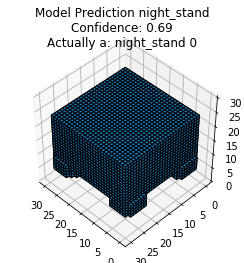

In [52]:
prediction = eval_model.predict(x_tp.reshape(1, 30, 30, 30, 1))[0]

plot_vox(x_tp.reshape(30, 30, 30), title="Model Prediction {}\nConfidence: {:.2f}\nActually a: {}"\
      .format(target_names[np.argmax(prediction)], prediction.max(),
              target_names[np.argmax(y_tp)]).strip('0'))

###### False Negative

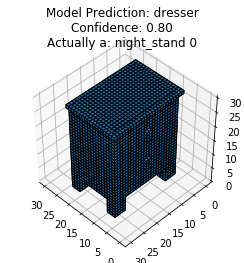

In [50]:
prediction = eval_model.predict(x_fn.reshape(1, 30, 30, 30, 1))[0]

plot_vox(x_fn.reshape(30, 30, 30), title="Model Prediction: {}\nConfidence: {:.2f}\nActually a: {}"\
      .format(target_names[np.argmax(prediction)], prediction.max(),
              target_names[np.argmax(y_fn)]))

In [21]:
print('Actual: {}'.format(target_names[np.argmax(y_fn)]))

Actual: night_stand


###### Look at Dimensional Perturbations for pair of classes with poor discrimination

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


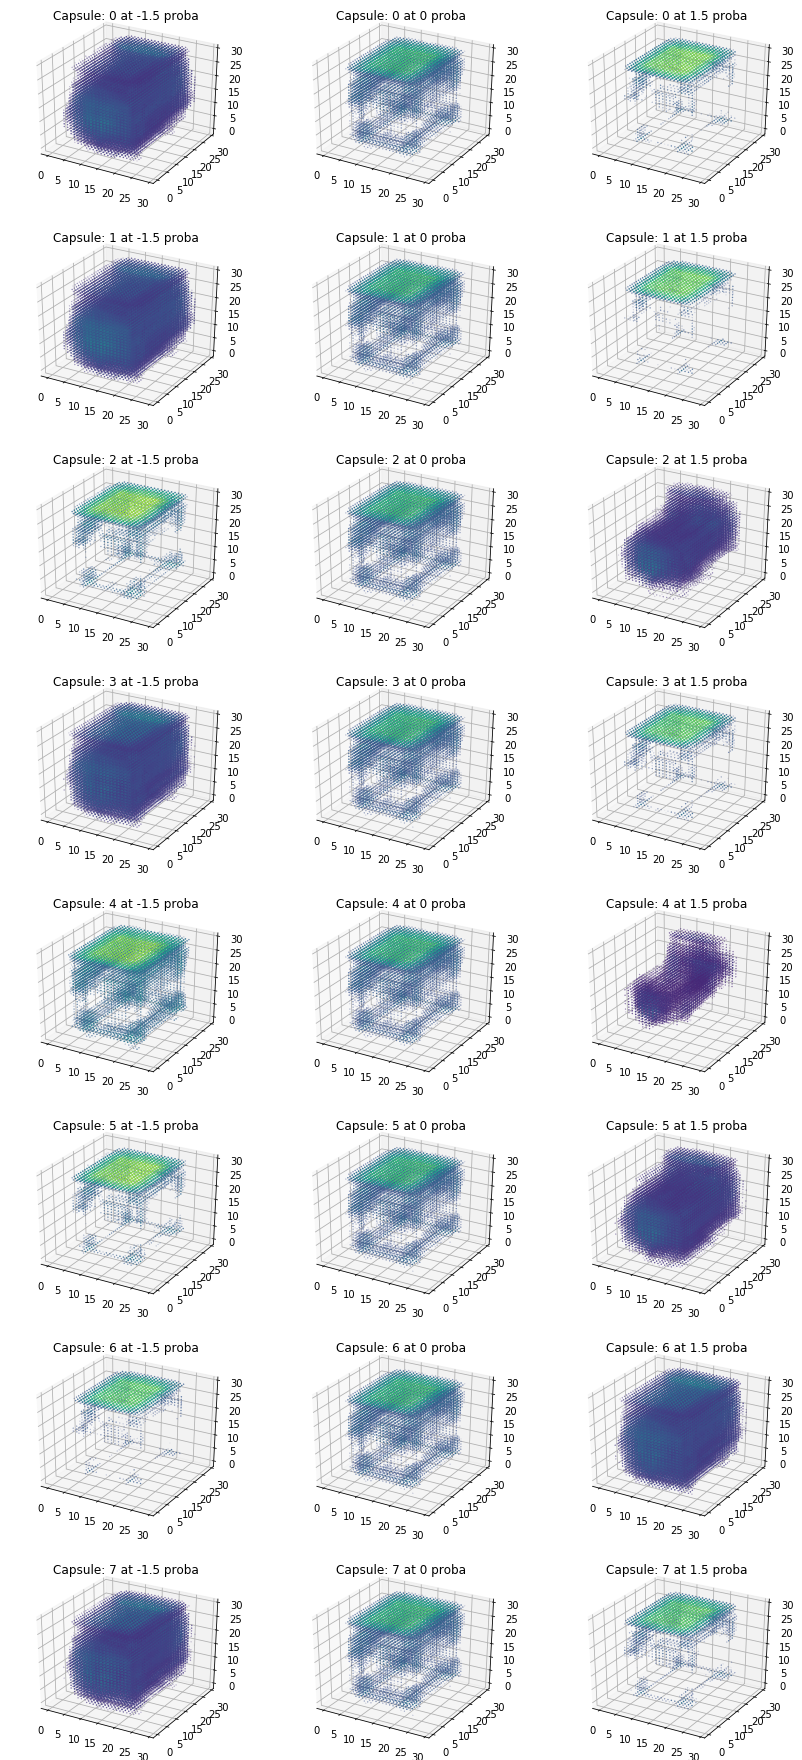

In [53]:
# plot_compare_recons(x_tp, x_fn, y_tp, y_fn, 8,
#                     manipulate_model, proba_range=[-1.5, 0, 1.5],
#                     dotsize_scale=10, dotsize_offset=3)


plot_recons(x_tp, y_tp, 8,
            manipulate_model, dotsize_scale=10, proba_range=[-1.5, 0, 1.5],
            dotsize_offset=3)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


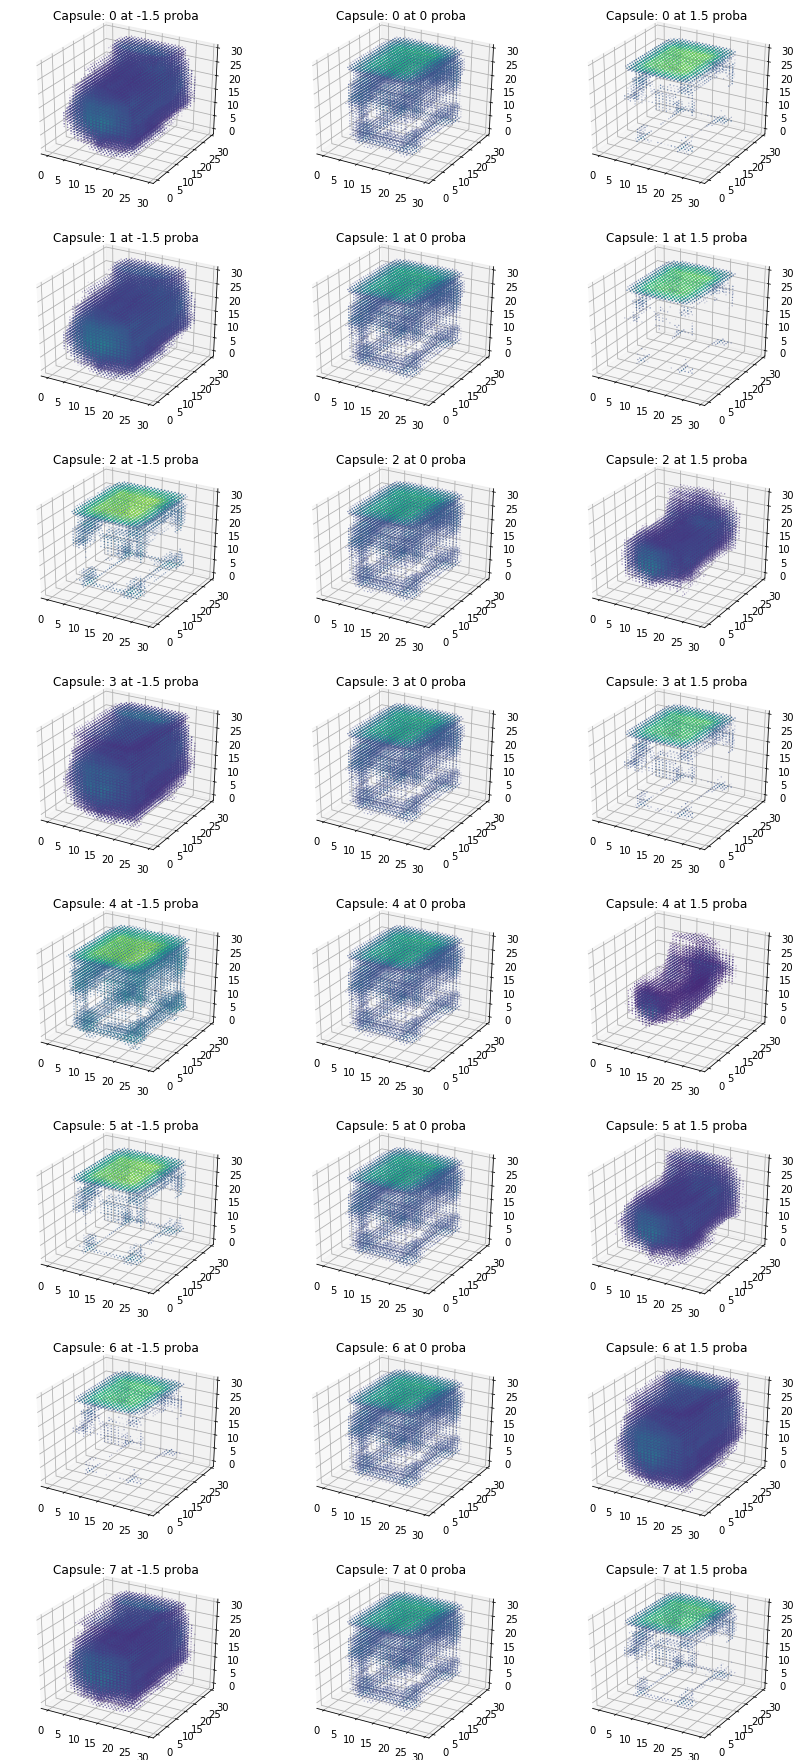

In [54]:
plot_recons(x_fn, y_fn, 8,
            manipulate_model, dotsize_scale=10, proba_range=[-1.5, 0, 1.5],
            dotsize_offset=3)

###### What do dimensional perturbations look like for successful discrimination between nightstands and dressers

In [152]:
sub_index = 0
sub_index_2 = 0
tp_index = (np.argmax(y_test, axis=1) == target_names.index('night_stand')) &\
           (np.argmax(y_pred, axis=1) == target_names.index('night_stand')) &\
           (np.max(y_pred, axis=1) > .93)
x_tp = x_test[tp_index][sub_index]
y_tp = y_test[tp_index][sub_index]

tn_index = (np.argmax(y_test, axis=1) == target_names.index('dresser')) &\
           (np.argmax(y_pred, axis=1) == target_names.index('dresser')) &\
           (np.max(y_pred, axis=1) > .89) # as similar as possible yet confidently different
x_tn = x_test[tn_index][sub_index_2]
y_tn = y_test[tn_index][sub_index_2]

###### True Positive

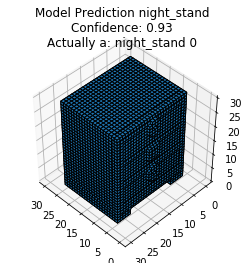

In [142]:
prediction = eval_model.predict(x_tp.reshape(1, 30, 30, 30, 1))[0]

plot_vox(x_tp.reshape(30, 30, 30), title="Model Prediction {}\nConfidence: {:.2f}\nActually a: {}"\
      .format(target_names[np.argmax(prediction)], prediction.max(),
              target_names[np.argmax(y_tp)]).strip('0'))

###### True Negative

Night Stand True Positive and True Negative (dresser True Positive) High Discriminative Power

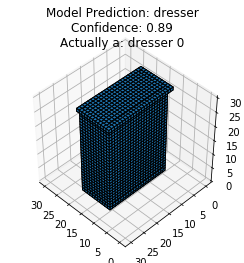

In [153]:
prediction = eval_model.predict(x_tn.reshape(1, 30, 30, 30, 1))[0]

plot_vox(x_tn.reshape(30, 30, 30), title="Model Prediction: {}\nConfidence: {:.2f}\nActually a: {}"\
      .format(target_names[np.argmax(prediction)], prediction.max(),
              target_names[np.argmax(y_tn)]))

###### Look at Dimensional Perturbations TP Night Stand high confidence, TN Night Stand high confidence (Dresser) 

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


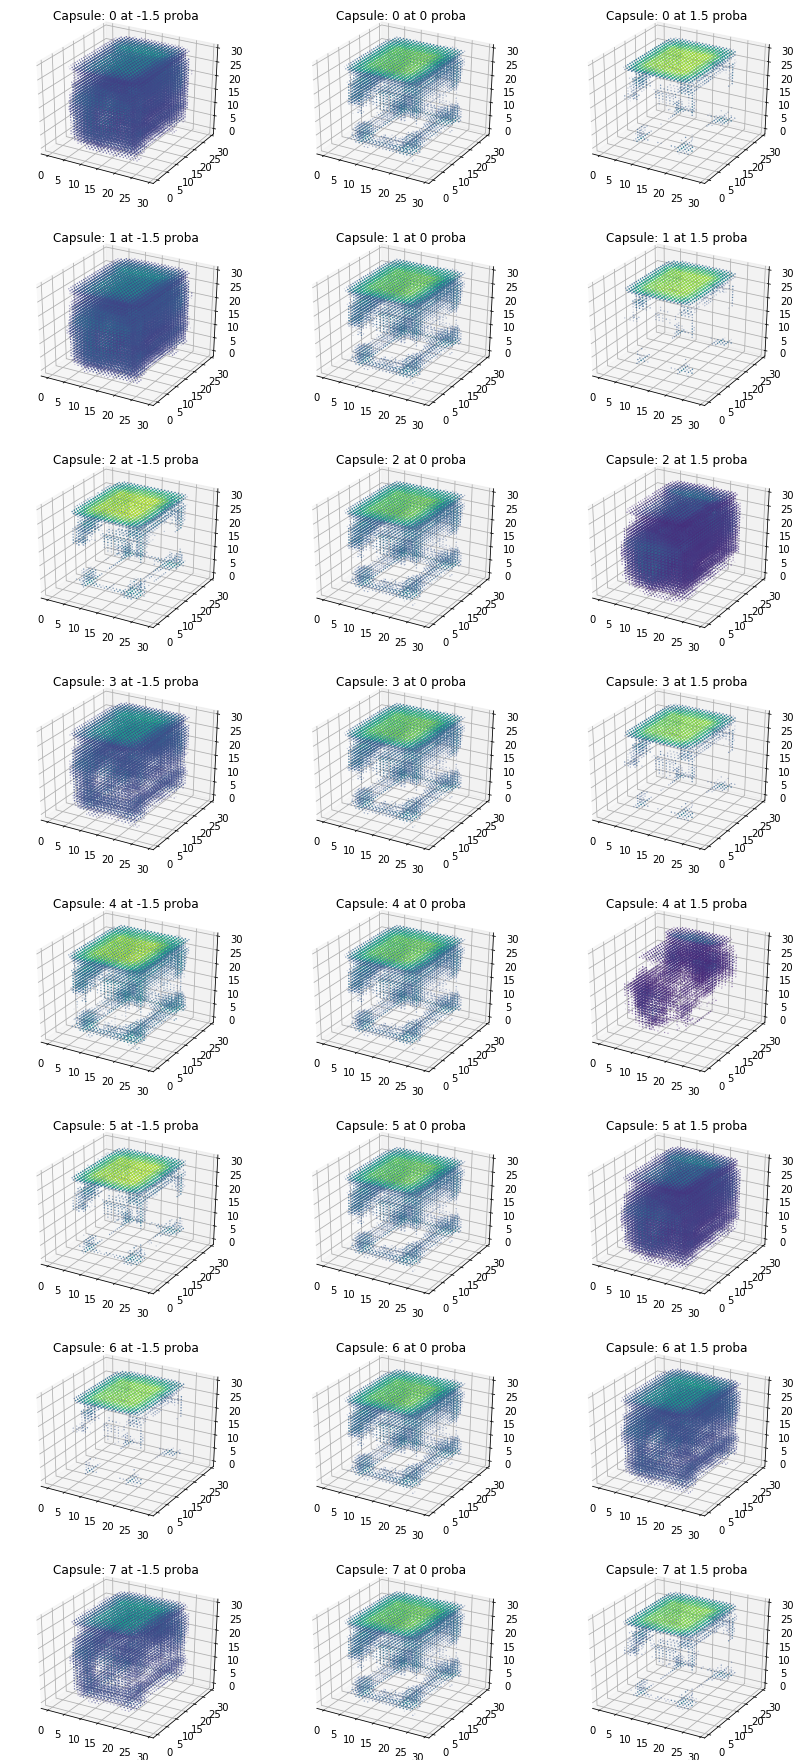

In [144]:
# plot_compare_recons(x_tp, x_fn, y_tp, y_fn, 8,
#                     manipulate_model, proba_range=[-1.5, 0, 1.5],
#                     dotsize_scale=10, dotsize_offset=3)


plot_recons(x_tp, y_tp, 8,
            manipulate_model, dotsize_scale=10, proba_range=[-1.5, 0, 1.5],
            dotsize_offset=3)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


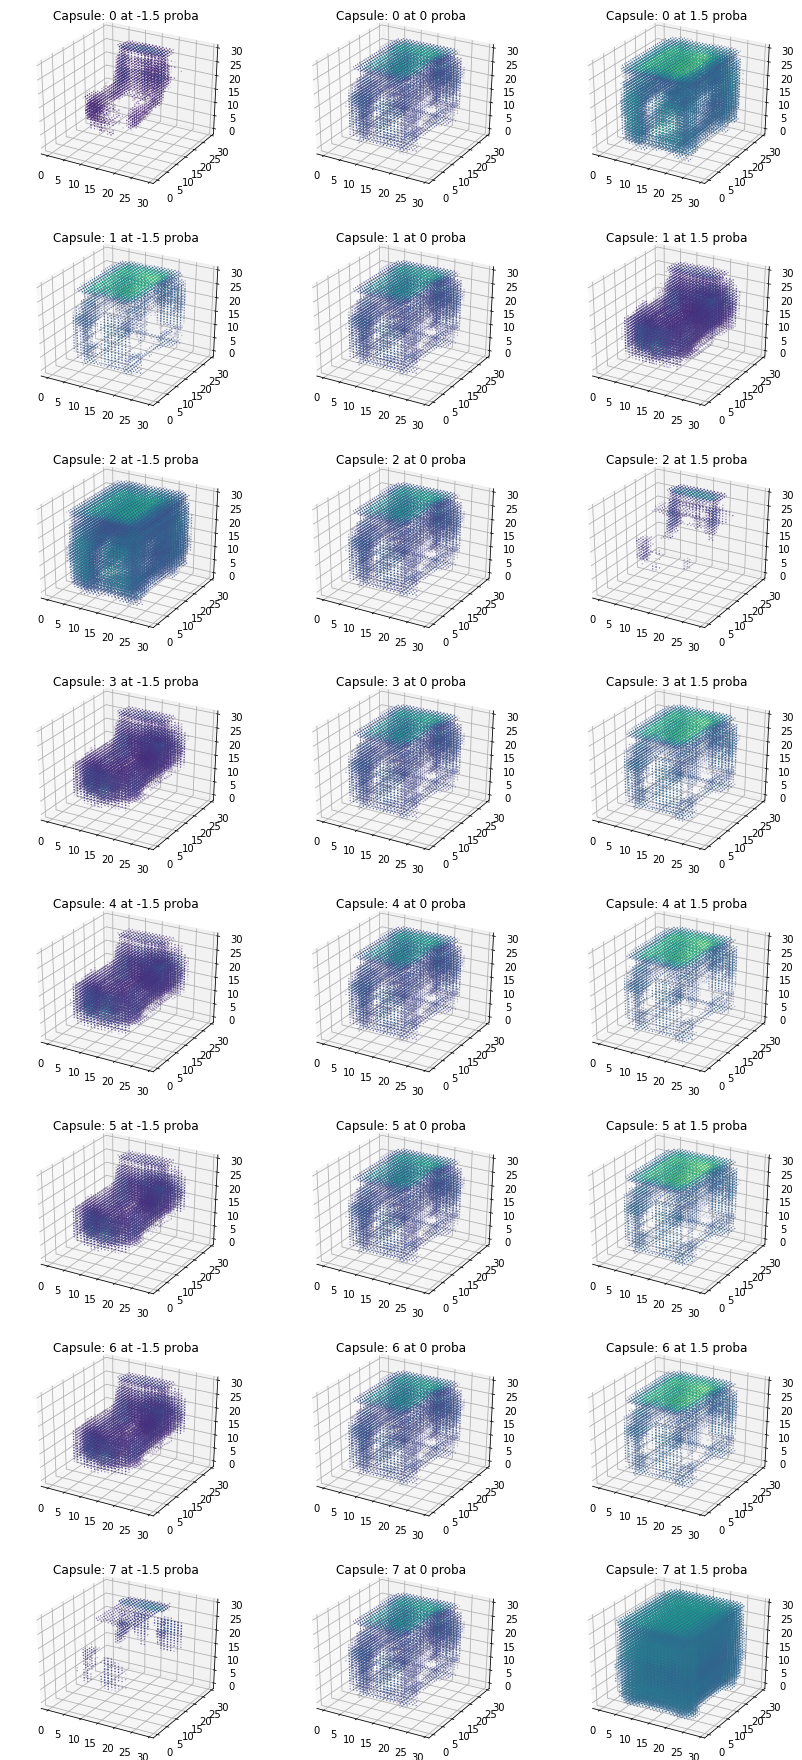

In [145]:
plot_recons(x_tn, y_tn, 8,
            manipulate_model, dotsize_scale=10, proba_range=[-1.5, 0, 1.5],
            dotsize_offset=3)

#### Look at top performer wth 4 channel
- Precision Recall AUC
- Confusion Matrix
- Compare unsuccessful classes to successful ones using map activation plots

In [9]:
df

accuracy  mean_avg_prec  rot_accuracy  rot_mean_avg_prec  \
19   0.90969        0.84778       0.34251            0.37395   
12   0.90198        0.83673       0.32930            0.35308   
18   0.89317        0.82704       0.32709            0.34672   
20   0.89207        0.82522       0.33260            0.35360   
2    0.88656        0.82756           NaN                NaN   
3    0.88436        0.82462           NaN                NaN   
7    0.87996        0.81304           NaN                NaN   
17   0.87885        0.81921           NaN                NaN   
5    0.87775        0.80771           NaN                NaN   
15   0.87775        0.80390           NaN                NaN   
9    0.87445        0.81544           NaN                NaN   
8    0.87225        0.80079       0.31938            0.32860   
14   0.87115        0.81003           NaN                NaN   
1    0.85683        0.79138           NaN                NaN   
0    0.85242        0.76423           NaN                NaN   
13   0.85022        0.75254           NaN                NaN   
21   0.85022        0.73431           NaN                NaN   
4    0.83921        0.75976           NaN                NaN   
16   0.83480        0.74217           NaN                NaN   
11   0.83040        0.72242           NaN                NaN   
6    0.72467        0.59002           NaN                NaN   
10   0.11013        0.19332           NaN                NaN   

   primary_cap_kernel_size n_channels lam_recon first_layer_kernel_size  \
19                       9          1      0.04                       9   
12                       9          2      0.04                       9   
18                       9          3      0.04                       9   
20                       9          2      0.04                       9   
2                        9          4      0.04                       9   
3                        9          4      0.04                       9   
7                        9          4      0.04                       9   
17                       9          4      0.04                       9   
5                        9          4      0.04                       9   
15                       7          4      0.04                       9   
9                        9          4      0.04                       9   
8                        9          3      0.04                       9   
14                       9          4      0.04                       9   
1                        9          4      0.04                       9   
0                        7          4      0.04                       9   
13                       7          4      0.04                       9   
21                       7          4      0.04                       9   
4                        9          4      0.04                       9   
16                       7          4      0.04                       9   
11                       7          4      0.04                       9   
6                        7          4      0.04                       9   
10                       7          4      0.04                       9   

   dim_sub_capsule dim_primary_capsule conv_layer_filters NUM_EPOCHS INIT_LR  \
19               8                   8                256         10   0.003   
12              16                   8                128         10   0.003   
18              16                   4                128         10   0.003   
20              16                   4                128         10   0.003   
2                8                   8                 48         10   0.003   
3                8                   4                 48         10   0.003   
7               16                   8                 48         10   0.003   
17               8                   8                 24         10   0.003   
5               16                   8                 24         10   0.003   
15   